### Домашняя работа "Оценка точности модели, переобучение, регуляризация"

In [1]:
import pandas as pd
import pprint
pp = pprint.PrettyPrinter()
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
# Формируем набор признаков и целевую переменную

X = data[data.columns[:-1]]
Y = data['affair']

In [4]:
from sklearn.linear_model import LogisticRegression
Lg = LogisticRegression()

In [5]:
from sklearn.model_selection import train_test_split

# Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [6]:
# Обучаем модель
Lg.fit(X_train, Y_train)

# Получаем прогнозные значения модели (переменная predictions)
predictions = Lg.predict_proba(X_test)

In [7]:
Lg.score(X_test, Y_test)

0.7319371727748691

#### Оценка качества модели¶

In [8]:
tpr_recall_list= []
fpr_list = []
precision_list = []

thres_list = [0.9, 0.8, 0.7, 0.6, 0.55, 0.5, 0.45, 0.4, 0.3, 0.2, 0.1, 0]

for thres in thres_list:
    
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative

    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
        if predicted_prob >= thres:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1

    tpr_recall = tp / (tp + fn)
    fpr = fp / (fp + tn)
    precision = tp / (tp + fp)

    tpr_recall_list.append(tpr_recall)
    fpr_list.append(fpr)
    precision_list.append(precision)

#### Precision

In [9]:
# Precision = tp / (tp + fp)
pp.pprint(precision_list)

[1.0,
 0.7857142857142857,
 0.7522123893805309,
 0.6990291262135923,
 0.6607142857142857,
 0.6330532212885154,
 0.5783898305084746,
 0.5572916666666666,
 0.48963133640552997,
 0.4036281179138322,
 0.33482142857142855,
 0.31780104712041884]


#### True positive rate

In [10]:
# Доля правильно предсказанных

# Recall = tp / (tp + fn)

pp.pprint(tpr_recall_list)

[0.006589785831960461,
 0.054365733113673806,
 0.1400329489291598,
 0.2372322899505766,
 0.30477759472817134,
 0.3723228995057661,
 0.4497528830313015,
 0.528830313014827,
 0.700164744645799,
 0.8797364085667215,
 0.9884678747940692,
 1.0]


#### False positive rate

In [11]:
# Доля не правильно предсказанных

FPR = fp / (fp + tn)

pp.pprint(fpr_list)

[0.0,
 0.006907137375287797,
 0.021488871834228703,
 0.047582501918649274,
 0.07290867229470453,
 0.10053722179585571,
 0.15272448196469685,
 0.19570222563315426,
 0.3399846508058327,
 0.6055257099002302,
 0.9148119723714505,
 1.0]


In [12]:
# метод для построения графика precision-recall

from sklearn.metrics import precision_recall_curve

pr, re, thresholds = precision_recall_curve( Y_test, predictions[:, 1] )

In [13]:
# посмотрим что получилось
precision_recall_curve_ = pd.DataFrame({"Precision":pr[:-1], 'Recall':re[:-1], 'Thresholds':thresholds})
precision_recall_curve_.tail()

,Precision,Recall,Thresholds
1661,1.0,0.008237,0.899989
1662,1.0,0.006590,0.901548
1663,1.0,0.004942,0.902524
1664,1.0,0.003295,0.902939
1665,1.0,0.001647,0.929209


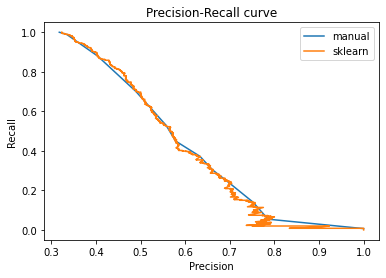

In [14]:
plt.plot( precision_list, tpr_recall_list, label = 'manual' )
plt.plot( pr, re, label = 'sklearn' )
plt.title('Precision-Recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import average_precision_score

# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.5761329928884336

In [16]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thresholds_ = roc_curve( Y_test, predictions[:, 1] )

In [17]:
# посмотрим что получилось
roc_curve_ = pd.DataFrame({"False positive rate":fpr, 'True positive rate':tpr, 'Thresholds':thresholds_})
roc_curve_.tail()

,False positive rate,True positive rate,Thresholds
840,0.975441,1.0,0.075443
841,0.976976,1.0,0.074769
842,0.992325,1.0,0.063647
843,0.993860,1.0,0.062519
844,1.000000,1.0,0.046206


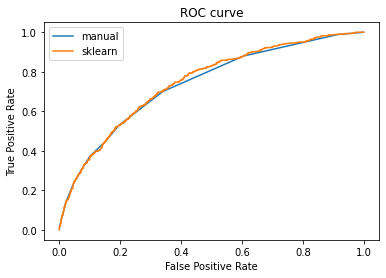

In [18]:
plt.plot( fpr_list, tpr_recall_list, label = 'manual' )
plt.plot( fpr, tpr, label = 'sklearn' )

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()